In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
def arrowed_spines(fig, ax, remove_ticks=False):
    """
    좌표축 화살표를 그리기 위한 함수
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, #overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, #overhang = ohg, 
             length_includes_head= True, clip_on = False)

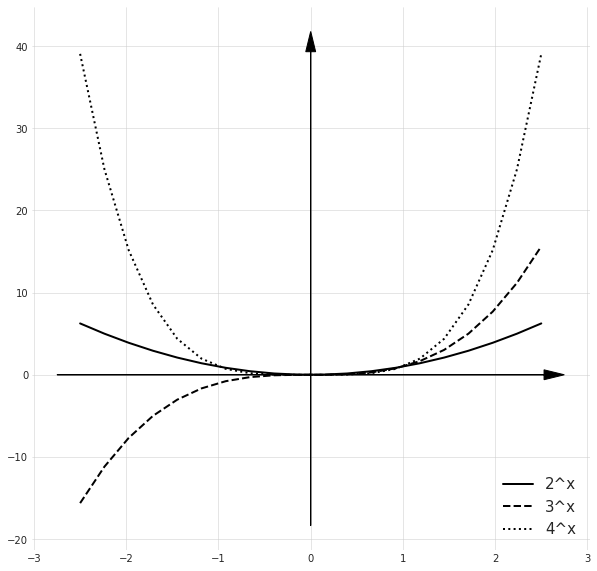

In [15]:
fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches((10,10))

ax1.xaxis.set_tick_params(labelsize=10)
ax1.yaxis.set_tick_params(labelsize=10)

x = np.linspace(-2.5, 2.5, 20)
y1, y2, y3 = x**2, x**3, x**4

ax1.plot(x, y1, color='k', label=r"2^x")
ax1.plot(x, y2, '--', color='k', label=r"3^x")
ax1.plot(x, y3, ':', color='k', label=r"4^x")
    
ax1.set_xlabel('', fontsize=20)
ax1.set_ylabel('', fontsize=20)
ax1.legend(fontsize=15)

arrowed_spines(fig, ax1)
fig.savefig("./log_fig.png", dpi=300, bbox_inches='tight')
plt.show()